# Migration analysis on MENA-FCV countries

In [1]:
from pathlib import Path

import holoviews as hv
from holoviews import dim, opts
import pandas as pd
import plotnine as p9


NOTEBOOK_PATH = Path().cwd().parent
DATA_PATH = NOTEBOOK_PATH / "../data"

In [2]:
country_mapping = {
    "AD": "Andorra",
    "AE": "United Arab Emirates",
    "AF": "Afghanistan",
    "AG": "Antigua and Barbuda",
    "AI": "Anguilla",
    "AL": "Albania",
    "AM": "Armenia",
    "AO": "Angola",
    "AQ": "Antarctica",
    "AR": "Argentina",
    "AS": "American Samoa",
    "AT": "Austria",
    "AU": "Australia",
    "AW": "Aruba",
    "AX": "Åland Islands",
    "AZ": "Azerbaijan",
    "BA": "Bosnia and Herzegovina",
    "BB": "Barbados",
    "BD": "Bangladesh",
    "BE": "Belgium",
    "BF": "Burkina Faso",
    "BG": "Bulgaria",
    "BH": "Bahrain",
    "BI": "Burundi",
    "BJ": "Benin",
    "BL": "Saint Barthélemy",
    "BM": "Bermuda",
    "BN": "Brunei Darussalam",
    "BO": "Bolivia, Plurinational State of",
    "BQ": "Bonaire, Sint Eustatius and Saba",
    "BR": "Brazil",
    "BS": "Bahamas",
    "BT": "Bhutan",
    "BV": "Bouvet Island",
    "BW": "Botswana",
    "BY": "Belarus",
    "BZ": "Belize",
    "CA": "Canada",
    "CC": "Cocos (Keeling) Islands",
    "CD": "Congo, Democratic Republic of the",
    "CF": "Central African Republic",
    "CG": "Congo",
    "CH": "Switzerland",
    "CI": "Côte d'Ivoire",
    "CK": "Cook Islands",
    "CL": "Chile",
    "CM": "Cameroon",
    "CN": "China",
    "CO": "Colombia",
    "CR": "Costa Rica",
    "CU": "Cuba",
    "CV": "Cabo Verde",
    "CW": "Curaçao",
    "CX": "Christmas Island",
    "CY": "Cyprus",
    "CZ": "Czechia",
    "DE": "Germany",
    "DJ": "Djibouti",
    "DK": "Denmark",
    "DM": "Dominica",
    "DO": "Dominican Republic",
    "DZ": "Algeria",
    "EC": "Ecuador",
    "EE": "Estonia",
    "EG": "Egypt",
    "EH": "Western Sahara",
    "ER": "Eritrea",
    "ES": "Spain",
    "ET": "Ethiopia",
    "FI": "Finland",
    "FJ": "Fiji",
    "FK": "Falkland Islands (Malvinas)",
    "FM": "Micronesia, Federated States of",
    "FO": "Faroe Islands",
    "FR": "France",
    "GA": "Gabon",
    "GB": "United Kingdom of Great Britain and Northern Ireland",
    "GD": "Grenada",
    "GE": "Georgia",
    "GF": "French Guiana",
    "GG": "Guernsey",
    "GH": "Ghana",
    "GI": "Gibraltar",
    "GL": "Greenland",
    "GM": "Gambia",
    "GN": "Guinea",
    "GP": "Guadeloupe",
    "GQ": "Equatorial Guinea",
    "GR": "Greece",
    "GS": "South Georgia and the South Sandwich Islands",
    "GT": "Guatemala",
    "GU": "Guam",
    "GW": "Guinea-Bissau",
    "GY": "Guyana",
    "HK": "Hong Kong",
    "HM": "Heard Island and McDonald Islands",
    "HN": "Honduras",
    "HR": "Croatia",
    "HT": "Haiti",
    "HU": "Hungary",
    "ID": "Indonesia",
    "IE": "Ireland",
    "IL": "Israel",
    "IM": "Isle of Man",
    "IN": "India",
    "IO": "British Indian Ocean Territory",
    "IQ": "Iraq",
    "IR": "Iran, Islamic Republic of",
    "IS": "Iceland",
    "IT": "Italy",
    "JE": "Jersey",
    "JM": "Jamaica",
    "JO": "Jordan",
    "JP": "Japan",
    "KE": "Kenya",
    "KG": "Kyrgyzstan",
    "KH": "Cambodia",
    "KI": "Kiribati",
    "KM": "Comoros",
    "KN": "Saint Kitts and Nevis",
    "KP": "Korea, Democratic People's Republic of",
    "KR": "Korea, Republic of",
    "KW": "Kuwait",
    "KY": "Cayman Islands",
    "KZ": "Kazakhstan",
    "LA": "Lao People's Democratic Republic",
    "LB": "Lebanon",
    "LC": "Saint Lucia",
    "LI": "Liechtenstein",
    "LK": "Sri Lanka",
    "LR": "Liberia",
    "LS": "Lesotho",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "LV": "Latvia",
    "LY": "Libya",
    "MA": "Morocco",
    "MC": "Monaco",
    "MD": "Moldova, Republic of",
    "ME": "Montenegro",
    "MF": "Saint Martin (French part)",
    "MG": "Madagascar",
    "MH": "Marshall Islands",
    "MK": "North Macedonia",
    "ML": "Mali",
    "MM": "Myanmar",
    "MN": "Mongolia",
    "MO": "Macao",
    "MP": "Northern Mariana Islands",
    "MQ": "Martinique",
    "MR": "Mauritania",
    "MS": "Montserrat",
    "MT": "Malta",
    "MU": "Mauritius",
    "MV": "Maldives",
    "MW": "Malawi",
    "MX": "Mexico",
    "MY": "Malaysia",
    "MZ": "Mozambique",
    "NA": "Namibia",
    "NC": "New Caledonia",
    "NE": "Niger",
    "NF": "Norfolk Island",
    "NG": "Nigeria",
    "NI": "Nicaragua",
    "NL": "Netherlands, Kingdom of the",
    "NO": "Norway",
    "NP": "Nepal",
    "NR": "Nauru",
    "NU": "Niue",
    "NZ": "New Zealand",
    "OM": "Oman",
    "PA": "Panama",
    "PE": "Peru",
    "PF": "French Polynesia",
    "PG": "Papua New Guinea",
    "PH": "Philippines",
    "PK": "Pakistan",
    "PL": "Poland",
    "PM": "Saint Pierre and Miquelon",
    "PN": "Pitcairn",
    "PR": "Puerto Rico",
    "PS": "Palestine, State of",
    "PT": "Portugal",
    "PW": "Palau",
    "PY": "Paraguay",
    "QA": "Qatar",
    "RE": "Réunion",
    "RO": "Romania",
    "RS": "Serbia",
    "RU": "Russian Federation",
    "RW": "Rwanda",
    "SA": "Saudi Arabia",
    "SB": "Solomon Islands",
    "SC": "Seychelles",
    "SD": "Sudan",
    "SE": "Sweden",
    "SG": "Singapore",
    "SH": "Saint Helena, Ascension and Tristan da Cunha",
    "SI": "Slovenia",
    "SJ": "Svalbard and Jan Mayen",
    "SK": "Slovakia",
    "SL": "Sierra Leone",
    "SM": "San Marino",
    "SN": "Senegal",
    "SO": "Somalia",
    "SR": "Suriname",
    "SS": "South Sudan",
    "ST": "Sao Tome and Principe",
    "SV": "El Salvador",
    "SX": "Sint Maarten (Dutch part)",
    "SY": "Syrian Arab Republic",
    "SZ": "Eswatini",
    "TC": "Turks and Caicos Islands",
    "TD": "Chad",
    "TF": "French Southern Territories",
    "TG": "Togo",
    "TH": "Thailand",
    "TJ": "Tajikistan",
    "TK": "Tokelau",
    "TL": "Timor-Leste",
    "TM": "Turkmenistan",
    "TN": "Tunisia",
    "TO": "Tonga",
    "TR": "Türkiye",
    "TT": "Trinidad and Tobago",
    "TV": "Tuvalu",
    "TW": "Taiwan, Province of China",
    "TZ": "Tanzania, United Republic of",
    "UA": "Ukraine",
    "UG": "Uganda",
    "UM": "United States Minor Outlying Islands",
    "US": "United States of America",
    "UY": "Uruguay",
    "UZ": "Uzbekistan",
    "VA": "Holy See",
    "VC": "Saint Vincent and the Grenadines",
    "VE": "Venezuela, Bolivarian Republic of",
    "VG": "Virgin Islands (British)",
    "VI": "Virgin Islands (U.S.)",
    "VN": "Viet Nam",
    "VU": "Vanuatu",
    "WF": "Wallis and Futuna",
    "WS": "Samoa",
    "YE": "Yemen",
    "YT": "Mayotte",
    "ZA": "South Africa",
    "ZM": "Zambia",
    "ZW": "Zimbabwe",
}

COUNTRY_CODES = [
    "SY",
    "EG",
    "LB",
    "IQ",
    "PS",
    "PS",
    "MA",
    "PK",
    "AF",
    "DZ",
]

In [3]:
df = pd.read_csv(DATA_PATH / "international_migration_flow.csv").assign(
    country_from_iso2=lambda x: x["country_from"],
    country_to_iso2=lambda x: x["country_to"],
    country_from=lambda x: x["country_from"].map(country_mapping),
    country_to=lambda x: x["country_to"].map(country_mapping),
)
df.sample(n=5)

country_from country_to migration_month  num_migrants  \
858821         Libya       Iraq         2019-10            29   
812258       Liberia  Argentina         2019-07             6   
1117877  Philippines     Israel         2021-12           189   
1032655      Nigeria      Libya         2020-02           297   
503463       Georgia      Spain         2022-08           213   

        country_from_iso2 country_to_iso2  
858821                 LY              IQ  
812258                 LR              AR  
1117877                PH              IL  
1032655                NG              LY  
503463                 GE              ES

The table below shows the annual migration flow from MENA-FCV countries to other countries. All MENA-FCV countries experienced a dip in migration flows during the COVID-19 pandemic, with many countries seeing a significant decrease in the number of migrants. However, Pakistan saw a spike in migration outflows in 2022.

In [4]:
(
    df.query("country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_from", "migration_year"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_from", "migration_year"])
    .pivot(index="country_from", columns="migration_year", values="num_migrants")
)

migration_year          2019    2020    2021     2022
country_from                                         
Afghanistan           103530   91669  189945   166065
Algeria               140366  124884  121219   170152
Egypt                 604339  343670  481975   914587
Iraq                  112660  121287  107685   111173
Lebanon               204157  234975  221039   187912
Morocco               239073  185550  207872   278507
Pakistan              704808  414645  392041  1413852
Syrian Arab Republic  140730  166373  235297   355909

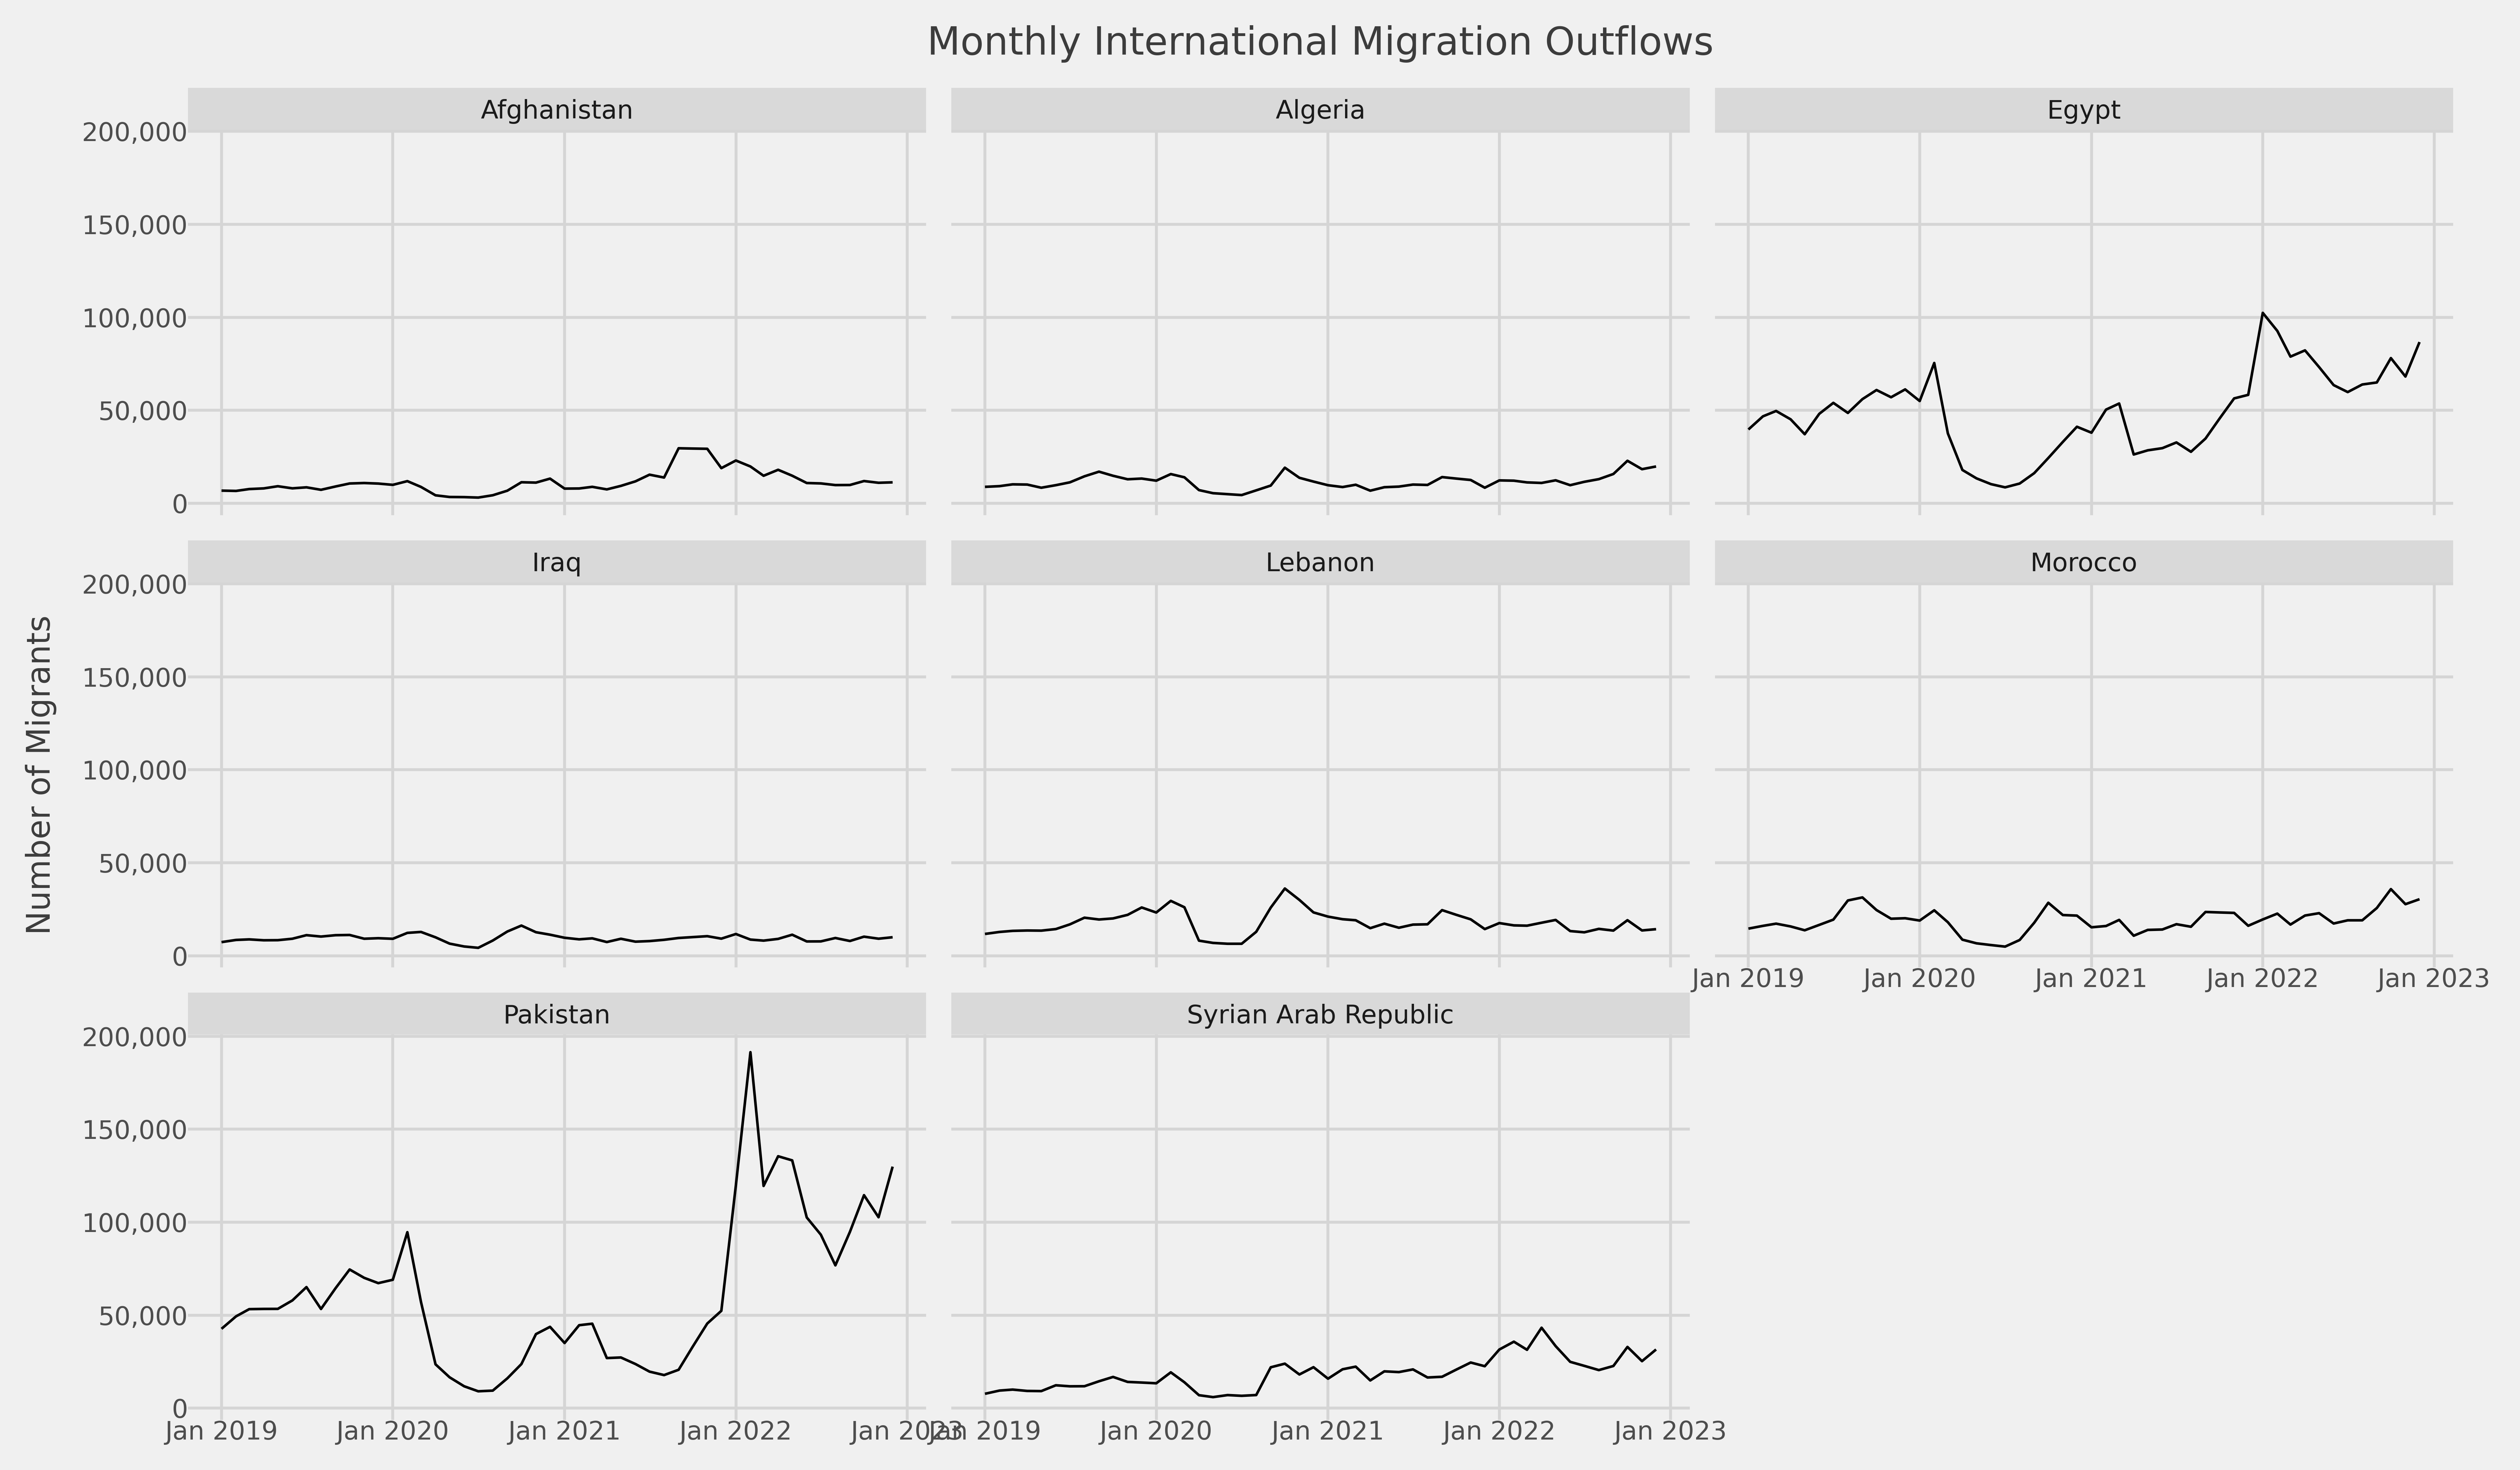

In [5]:
(
    df.query("country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_from", "migration_month"])
    .agg({"num_migrants": "sum"})
    .reset_index()
    .sort_values(["country_from", "migration_month"])
    .pipe((p9.ggplot, "data"))
    + p9.aes(x="migration_month", y="num_migrants", group="country_from")
    + p9.geom_line()
    + p9.facet_wrap("country_from", ncol=3)
    + p9.scale_y_continuous(labels=lambda labels: [f"{int(x):,}" for x in labels])
    + p9.scale_x_date(date_labels="%b %Y", breaks="1 year")
    + p9.labs(
        title="Monthly International Migration Outflows",
        x="",
        y="Number of Migrants",
    )
    + p9.theme_538()
    + p9.theme(figure_size=(12, 7), dpi=300)
)

In [6]:
(
    df.query("country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_from", "country_to"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_from", "num_migrants"], ascending=[True, False])
    # get top 3 destination countries for each origin country
    .groupby("country_from")
    .head(3)
    .reset_index(drop=True)
)

country_from                                         country_to  \
0            Afghanistan                                           Pakistan   
1            Afghanistan                                            Türkiye   
2            Afghanistan                           United States of America   
3                Algeria                                             France   
4                Algeria                                             Canada   
5                Algeria                                            Morocco   
6                  Egypt                                       Saudi Arabia   
7                  Egypt                                              Libya   
8                  Egypt                               United Arab Emirates   
9                   Iraq                                            Türkiye   
10                  Iraq                                         Bangladesh   
11                  Iraq  United Kingdom of Great Britain and Northern I...   
12               Lebanon                               Syrian Arab Republic   
13               Lebanon                                           Ethiopia   
14               Lebanon                               United Arab Emirates   
15               Morocco                                              Spain   
16               Morocco                                             France   
17               Morocco                                              Italy   
18              Pakistan                                       Saudi Arabia   
19              Pakistan                               United Arab Emirates   
20              Pakistan  United Kingdom of Great Britain and Northern I...   
21  Syrian Arab Republic                                            Türkiye   
22  Syrian Arab Republic                                               Iraq   
23  Syrian Arab Republic                               United Arab Emirates   

    num_migrants  
0         151558  
1          83009  
2          66004  
3         225916  
4          36543  
5          35690  
6         937113  
7         241818  
8         237443  
9          76448  
10         38701  
11         32824  
12        229249  
13         65335  
14         61217  
15        235893  
16        184093  
17         74322  
18        948913  
19        895127  
20        143446  
21        277092  
22        108385  
23        104202

The table below shows the annual migration flow from other countries to MENA-FCV countries

In [7]:
(
    df.query("country_to_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "migration_year"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_to", "migration_year"])
    .pivot(index="country_to", columns="migration_year", values="num_migrants")
)

migration_year          2019    2020    2021    2022
country_to                                          
Afghanistan            89590   66438   60701   81698
Algeria                85849   78264   60543   67476
Egypt                 505476  586969  538491  466232
Iraq                  165750  123981  135884  167685
Lebanon                84951   52910   67597   97156
Morocco               135912  130713  121452  121802
Pakistan              667201  616570  623130  485986
Syrian Arab Republic  311007  175655  149338  139160

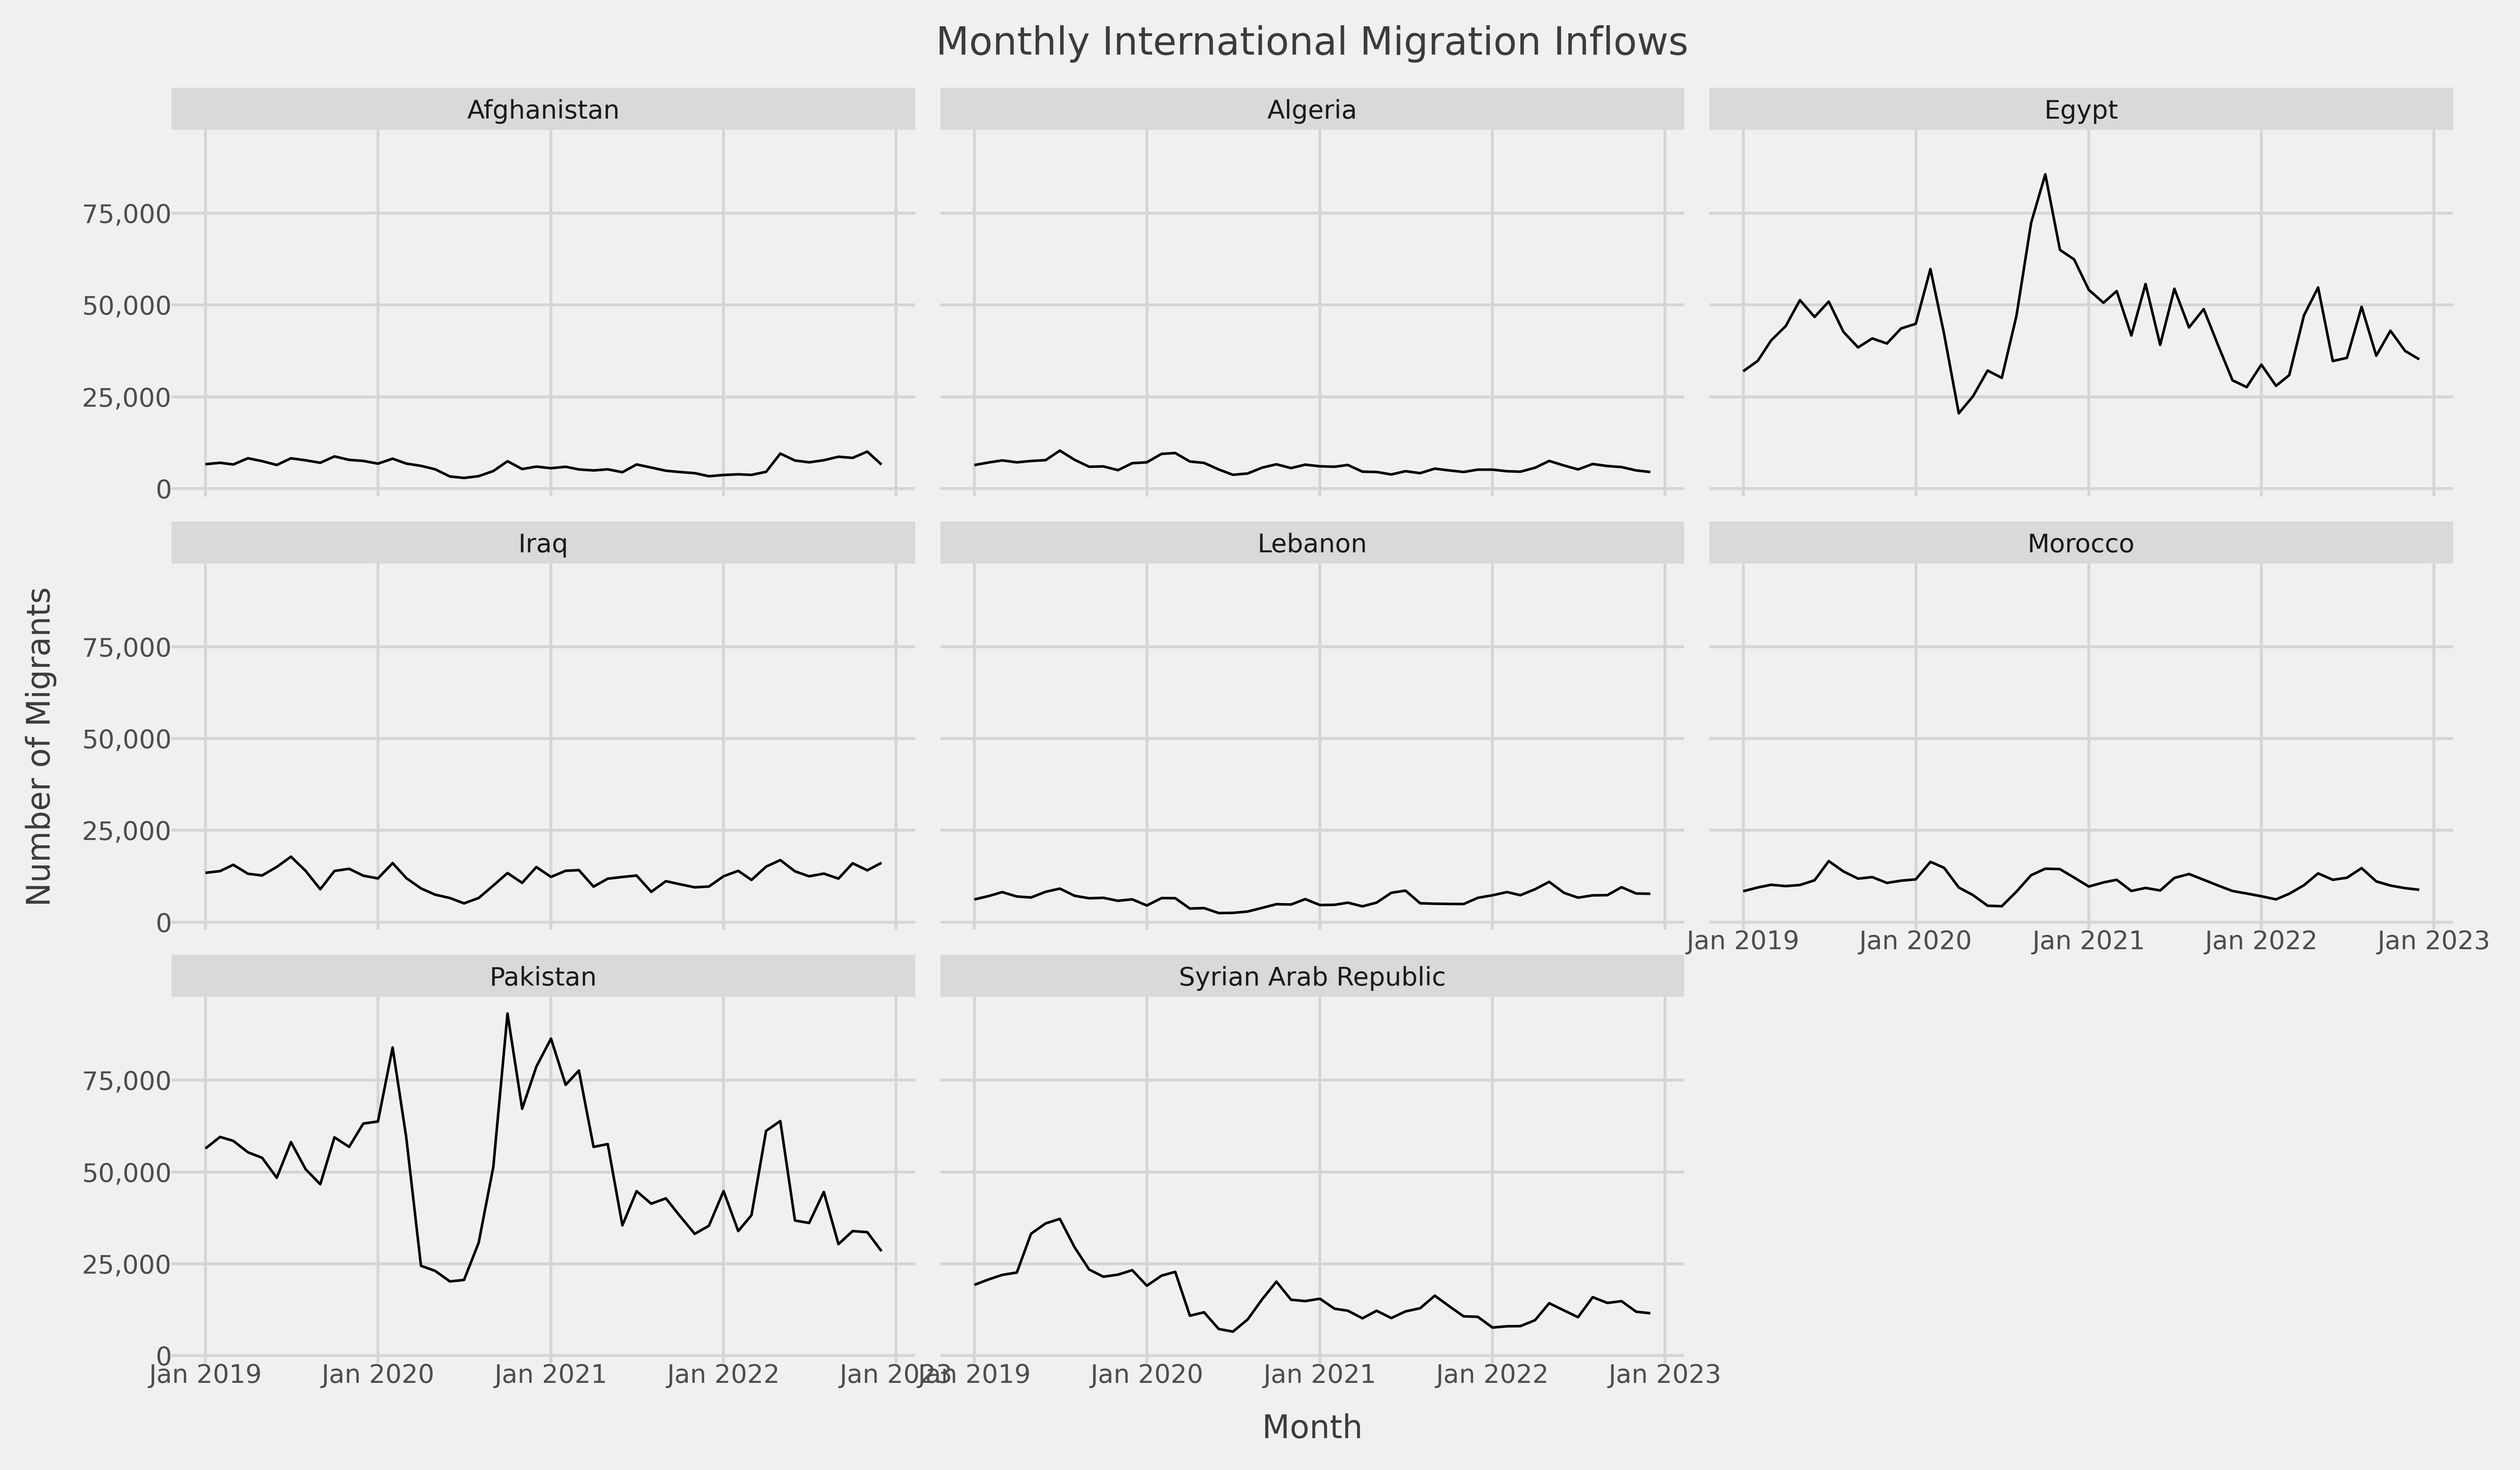

In [8]:
(
    df.query("country_to_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "migration_month"])
    .agg({"num_migrants": "sum"})
    .reset_index()
    .sort_values(["country_to", "migration_month"])
    .pipe((p9.ggplot, "data"))
    + p9.aes(x="migration_month", y="num_migrants", group="country_to")
    + p9.geom_line()
    + p9.facet_wrap("country_to", ncol=3)
    + p9.scale_y_continuous(labels=lambda labels: [f"{int(x):,}" for x in labels])
    + p9.scale_x_date(date_labels="%b %Y", breaks="1 year")
    + p9.labs(
        title="Monthly International Migration Inflows",
        x="Month",
        y="Number of Migrants",
    )
    + p9.theme_538()
    + p9.theme(figure_size=(12, 7), dpi=300)
)

In [9]:
(
    df.query("country_to_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "country_from"])
    .agg(
        {
            "num_migrants": "sum",
        }
    )
    .reset_index()
    .sort_values(["country_to", "num_migrants"], ascending=[True, False])
    # get top 3 origin countries for each destination country
    .groupby("country_to")
    .head(3)
    .reset_index(drop=True)
)

country_to          country_from  num_migrants
0            Afghanistan               Türkiye         87965
1            Afghanistan              Pakistan         69829
2            Afghanistan          Saudi Arabia         38407
3                Algeria                France         58446
4                Algeria               Morocco         22444
5                Algeria               Tunisia         13430
6                  Egypt          Saudi Arabia        793942
7                  Egypt                Kuwait        216739
8                  Egypt                 Sudan        177603
9                   Iraq               Türkiye        127534
10                  Iraq  Syrian Arab Republic        108385
11                  Iraq                 Egypt         37282
12               Lebanon  Syrian Arab Republic         96435
13               Lebanon          Saudi Arabia         30121
14               Lebanon               Türkiye         10137
15               Morocco                France         51132
16               Morocco                 Spain         46341
17               Morocco               Algeria         35690
18              Pakistan          Saudi Arabia       1139580
19              Pakistan  United Arab Emirates        456209
20              Pakistan           Afghanistan        151558
21  Syrian Arab Republic               Lebanon        229249
22  Syrian Arab Republic               Türkiye        205107
23  Syrian Arab Republic          Saudi Arabia         67255

In [10]:
mena_df = (
    df.query("country_to_iso2 in @COUNTRY_CODES & country_from_iso2 in @COUNTRY_CODES")
    .assign(
        migration_month=lambda x: pd.to_datetime(x["migration_month"], format="%Y-%m"),
        migration_year=lambda x: x["migration_month"].dt.year,
    )
    .groupby(["country_to", "country_from"])
    .agg({"num_migrants": "sum"})
    .reset_index()
    .sort_values(["country_to", "country_from", "num_migrants"], ascending=True)
)

In [11]:
(
    mena_df.pivot(
        index="country_to", columns="country_from", values="num_migrants"
    ).fillna(0)
)

country_from          Afghanistan  Algeria    Egypt     Iraq   Lebanon  \
country_to                                                               
Afghanistan                   0.0    228.0    543.0    632.0     186.0   
Algeria                     152.0      0.0  11705.0   4006.0    1638.0   
Egypt                       889.0   8821.0      0.0  20667.0   33077.0   
Iraq                        882.0   1838.0  37282.0      0.0   20655.0   
Lebanon                     229.0   1437.0   9672.0   8446.0       0.0   
Morocco                     228.0  35690.0  11545.0   2431.0    1524.0   
Pakistan                 151558.0   1154.0   2088.0  19974.0     723.0   
Syrian Arab Republic        888.0   3008.0  22474.0  31190.0  229249.0   

country_from          Morocco  Pakistan  Syrian Arab Republic  
country_to                                                     
Afghanistan             158.0   69829.0                 586.0  
Algeria               22444.0    1634.0                3452.0  
Egypt                  7646.0    2821.0               56637.0  
Iraq                   1568.0   30700.0              108385.0  
Lebanon                 767.0     509.0               96435.0  
Morocco                   0.0    1884.0                1223.0  
Pakistan                953.0       0.0                 909.0  
Syrian Arab Republic    846.0    1018.0                   0.0

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
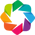

In [12]:
import pandas as pd
from bokeh.sampledata.les_mis import data

import holoviews as hv
from holoviews import dim, opts

hv.extension("bokeh", inline=True)
hv.output(size=200)

In [13]:
# Create nodes from all unique countries
all_countries = pd.concat([mena_df["country_from"], mena_df["country_to"]]).unique()

nodes = hv.Dataset(pd.DataFrame({"country": all_countries}), "country")

# Create chord diagram
chord = hv.Chord((mena_df, nodes))
chord.opts(
    opts.Chord(
        cmap="Category20",
        edge_cmap="Category20",
        edge_color=dim("country_from").str(),
        labels="country",
        node_color=dim("country").str(),
        edge_line_width=dim("num_migrants").norm() * 5,
        width=400,
        height=400,
    )
)

:Chord   [country_to,country_from]   (num_migrants)